## Logistic Regression
#### Gavin Daves, Rice University
#### INDE 577, Dr. Randy Davila

In this notebook, we will build a Logistic Regression Single Neuron Model in Python and then use it on the Spotify dataset.

In [78]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import a nice function for plotting decision boudaries
from mlxtend.plotting import plot_decision_regions

import sys
from sklearn.model_selection import train_test_split

sns.set_theme()

In [79]:
# The Logistic Regression class

class LogisticNeuron(object):
    """
    A class used to represent a logistic regression neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)

In [80]:
# Sigmoind activation function
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [81]:
# Binary cross entropy cost function
def binary_cross_entropy(y_hat, y):
    return -y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

In [82]:
# Loading the data

# Add the top-level directory to the system path
sys.path.append('../../')

# Load the data
import clean_data as sd

df = sd.get_df()

blink = df[df['artists'] == 'blink-182']
pearljam = df[df['artists'] == 'Pearl Jam']

### Background

One of the things that me and my dad bond over is music. We both have very broad tastes in music and a wide knowledge of alternative music. That being said, one of his favorite bands of all time is Pearl Jam, and one of his most hated is blink-182. That being said, I wanted to train a Logistic Regression model that classifies if my dad will love the song (it's predicted to be a Pearl Jam song) or hate it (it's predicted to be a blink-182 song) based on the Energy and Danceability of the song.

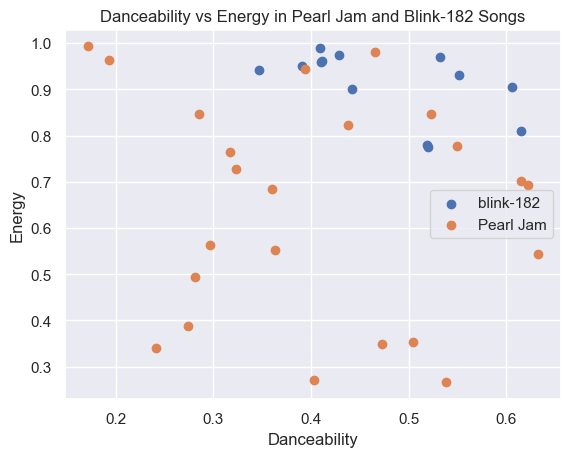

In [83]:
# Plot the data
plt.scatter(blink['danceability'], blink['energy'], label = 'blink-182')
plt.scatter(pearljam['danceability'], pearljam['energy'], label = 'Pearl Jam')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title("Danceability vs Energy in Pearl Jam and Blink-182 Songs")
plt.legend()
plt.show()

In [84]:
# Train the model on the Pearl Jam and Blink-182 data

X = np.vstack((blink[['danceability', 'energy']].values, pearljam[['danceability', 'energy']].values))
y = np.hstack((np.zeros(blink.shape[0]), np.ones(pearljam.shape[0])))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

dads_model = LogisticNeuron(sigmoid, binary_cross_entropy)

dads_model.train(X_train, y_train, alpha = 0.005, epochs = 10_000)

As we can see from the plotted data, the data is not linearly separable, but there is a general contrast between blink-182 songs and Pearl Jam songs in terms of energy and danceability. Therefore, we can use a logistic regression neuron to classify the songs based on these two features.

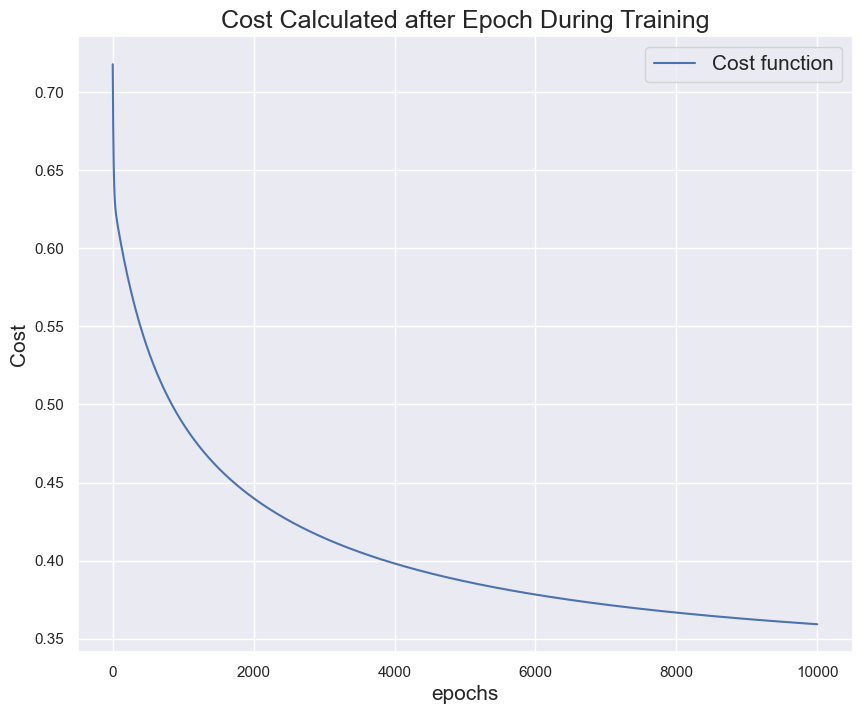

In [85]:
fig, axs = plt.subplots(figsize = (10, 8))
axs.plot(range(1, len(dads_model.errors_) + 1), 
        dads_model.errors_,
        label = "Cost function")
axs.set_xlabel("epochs", fontsize = 15)
axs.set_ylabel("Cost", fontsize = 15)
axs.legend(fontsize = 15)
axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
plt.show()


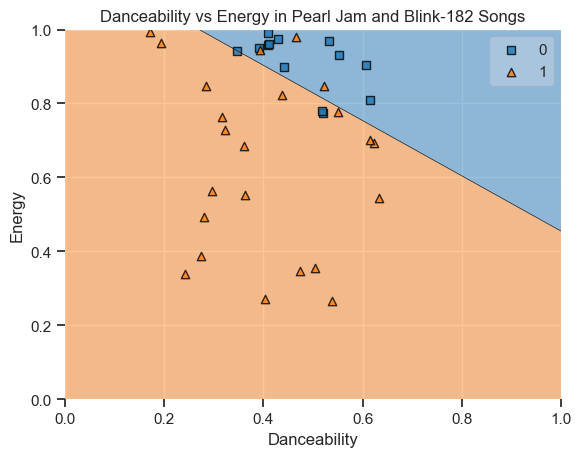

In [86]:
# Plot the decision boundary

plot_decision_regions(X, y.astype(np.int_),clf= dads_model)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title("Danceability vs Energy in Pearl Jam and Blink-182 Songs")

plt.show()

As can be seen in the decision boundary, the logisitic regression model 

In [87]:
# Accuracy of the model

y_hat = dads_model.predict(X_test)
y_hat = np.where(y_hat > 0.5, 1, 0)

accuracy = np.sum(y_hat == y_test)/y_test.shape[0]
print(f"Model accuracy: {accuracy*100}%")


Model accuracy: 87.5%
